c:\ProgramData\Anaconda3\envs\SMR-RS\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


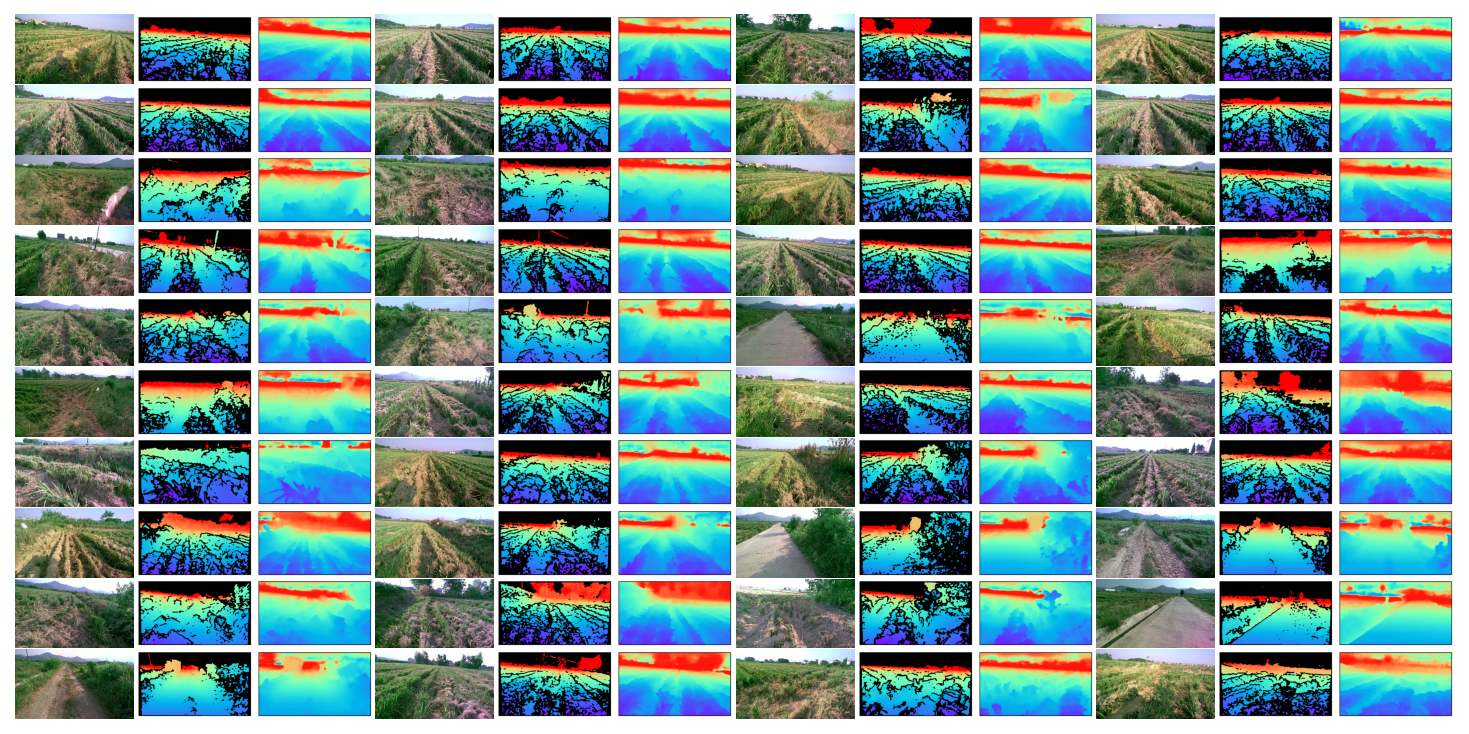

In [1]:
from utils.file import find_file
import cv2
import os
from utils.misc import imgsGridsPlot
dir = r"F:\results\D457"

files = find_file(dir,suffix='.png')
label_only_files = [(file if f'label_only' in file else None) for i, file in enumerate(files)] 

img_list=[]
for i, file in enumerate(label_only_files):
    if file is not None:
        label = cv2.imread(file, cv2.IMREAD_UNCHANGED)
        label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        
        depth_file = os.path.join(os.path.split(file)[0],os.path.basename(file)[:6]+'color_depth_only.png')    
        depth = cv2.imread(depth_file, cv2.IMREAD_UNCHANGED)
        depth = cv2.cvtColor(depth,cv2.COLOR_BGR2RGB)
        
        img_file = os.path.join(os.path.split(file)[0],os.path.basename(file)[:6]+'.jpg')
        img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        img_resize = cv2.resize(img,dsize=(436,256),interpolation=cv2.INTER_NEAREST)
        label_resize = cv2.resize(label,dsize=(436,256),interpolation=cv2.INTER_NEAREST)
        depth_resize = cv2.resize(depth,dsize=(436,256),interpolation=cv2.INTER_NEAREST)
        
        img_list.append(img_resize)
        img_list.append(label_resize)
        img_list.append(depth_resize)

imgsGridsPlot(imgs_list=img_list[:120],
            nColumns =12,
            axis_visible=False,
            save_path='demo/01.png',
            transparent=True,
            show_in_jupyter=True,
            dpi=150
            )

In [ ]:
for i, file in enumerate(depth_only_files):
    if file is not None:
        img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img,dsize=(436,256),interpolation=cv2.INTER_NEAREST)
        img_list.append(img_resize)

imgsGridsPlot(imgs_list=img_list,
            nRows=10,
            axis_visible=False,
            save_path='demo/00.png',
            transparent=True,
            show_in_jupyter=True,
            dpi=150
            )

In [ ]:
os.path.split(file)